# Evaluation Metrics in Machine Learning classification

<img src="./DMR.png">

 - <p style="font-size:16px"><strong>Data: </strong>Collection, Preprocessing, Storing, etc. </p>
 - <p style="font-size:16px"><strong>Model: </strong>ML models, Deep Learning, etc.
 - <p style="font-size:16px"><strong>Result: </strong> analyze with metrics like Accuracy,  Precision, Recall, etc.       
             
 <p style="font-size:16px">Here we want to be familiar with some of common metrics in classification problems through a simple example. </p>


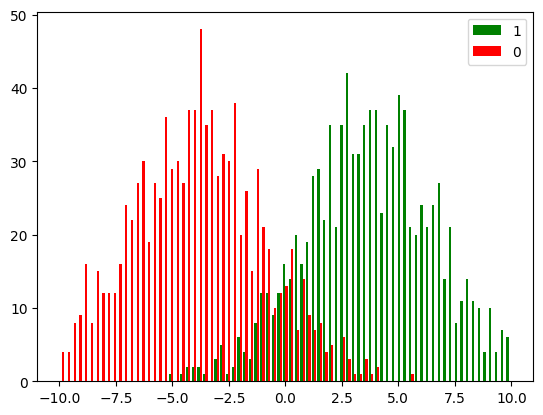

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

# Set a random seed for reproducibility
np.random.seed(0)

# Generate a 1 D dataset of ones
x1 = np.random.normal(4, 3, (1000,))
y1 = np.ones((1000,))

# Generate an unbalanced dataset
x2 = np.random.normal(-4, 3, (1000,))
y2 = np.zeros((1000,))

# Define the bins for the histograms
bins = np.linspace(-10, 10, 80)

# Combine the datasets
X = np.concatenate((x1 , x2), axis=0)
y = np.concatenate((y1 , y2), axis=0)

# Plot the datasets
plt.hist([x1,x2], bins,label=['1', '0'], color=['g', 'r'])
plt.legend(loc='upper right')

plt.show()


In [13]:
def model(data,threshold):
    prediction=[]
    for d in data:
        if d > threshold:
            prediction.append(1) 
        else:
            prediction.append(0)
    return prediction               

<p style="font-size:16px">Before continuing, Let's understand some basic concepts:</p>

- <p style="font-size:16px"><strong>TRUE POSITIVE (TP): </strong>A true positive is when the test result is predicted as YES and it is actually YES, i.e. positive.
    This means the prediction is true. </p>
- <p style="font-size:16px"><strong>TRUE NEGATIVE (TN): </strong>A true negative occurs when the test result is predicted as NO and it is actually NO, i.e. negative. This means the prediction is true. </p>
- <p style="font-size:16px"><strong>FALSE POSITIVE (FP): </strong>A false positive occurs when the test result is predicted as YES, i.e. positive, when it is actually NO. This means the prediction is false. </p>
- <p style="font-size:16px"><strong>FALSE NEGATIVE (FN): </strong>A false negative occurs when the test result is predicted as NO, i.e. Negative, but it is actually YES. This means the prediction is false. </p>


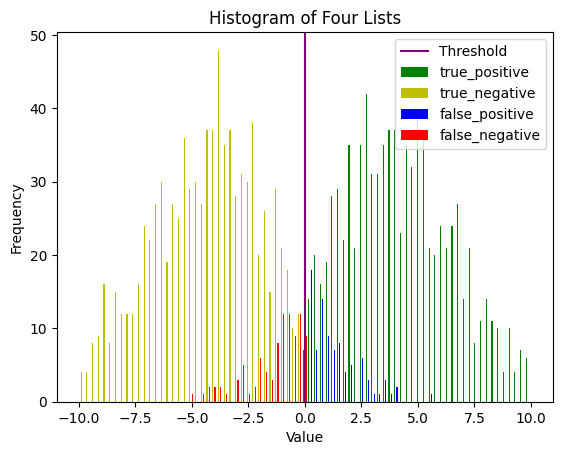

In [14]:
threshold=0
predictions = model(list(X),threshold=threshold)
true_positive = []
false_positive = []
false_negative = []
true_negative = []

for i in range(len(y)):
    if y[i] == predictions[i] == 1:
        true_positive.append(X[i])
    elif y[i] == predictions[i] == 0:
        true_negative.append(X[i])
    elif y[i] == 1 and predictions[i] == 0:
        false_negative.append(X[i])
    else:
        false_positive.append(X[i])
        

plt.axvline(x=threshold, color='purple',label='Threshold')
plt.hist([true_positive,true_negative,false_positive,false_negative],
         bins,
         label=['true_positive','true_negative','false_positive','false_negative'], 
          color=['g','y','b', 'r'])

plt.legend(loc='upper right')
plt.title("Histogram of Four Lists")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

- <p style="font-size:16px">Confusion Matrix </p>
<p style="font-size:16px">A confusion matrix is a matrix that summarizes the performance of a machine learning model on a set of test data. The matrix displays the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) produced by the model on the test data.
For binary classification, the matrix will be of a 2X2 table. Here we will see an example of it: </p>

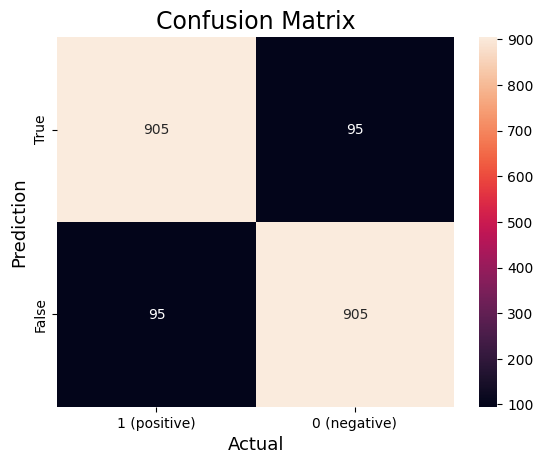

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#compute the confusion matrix.
cm = confusion_matrix(y,predictions)
 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['1 (positive)','0 (negative)'],
            yticklabels=['True','False'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

<p style="font-size:16px">From the confusion matrix, we can find the following metrics: <br>
Accuracy:  Accuracy is used to measure the performance of the model. It is the ratio of Total correct instances to the total instances. <br><br>
$ Accuracy = \Large\frac{TP + TN} {TP + TN + FP + FN} $ <br><br>
Precision: Precision is a measure of how accurate a model’s positive predictions are. It is defined as the ratio of true positive predictions to the total number of positive predictions made by the model.<br><br>
$Precision = \Large\frac{TP} {TP + FP}$<br><br>
Recall: Recall measures the effectiveness of a classification model in identifying all relevant instances from a dataset. It is the ratio of the number of true positive (TP) instances to the sum of true positive and false negative (FN) instances.<br><br>
$Recall= \Large\frac{TP} {TP + FN}$<br><br><br>
F1-Score: F1-score is used to evaluate the overall performance of a classification model. It is the harmonic mean of precision and recall. <br>
$F1-Score =\Large\frac{2* Precision * Recall}{Precision + Recall}$</p>

In [64]:

TP = len(true_positive)
TN = len(true_negative)
FP = len(false_positive)
FN = len(false_negative)


In [65]:
def metrics():
    accuracy = (TP + TN)/(TP + TN + FP + FN)
    precision = (TP)/(TP + FP)
    recall = (TP)/(TP + FN)
    f1 = (2 * precision * recall)/(precision + recall)
    print(f"accuracy:\t{round(accuracy, 2)}")
    print(f"precision:\t{round(precision, 2)}")
    print(f"recall: \t{round(recall, 2)}")
    print(f"f1-score:\t{round(f1, 2)}")

In [66]:
metrics()

accuracy:	0.91
precision:	0.91
recall: 	0.91
f1-score:	0.91
